# Assignment #1 - Basic Data Exploration, Visualization, and Analysis

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Grading

This assignment will be graded in two portions:
<ul>
<li> 50% - Correctness and functionality. Parts of the assignment (the functions you are asked to write) will be graded on whether they work correctly and generate correct answers. </li>
<li> 50% -Analysis and presentation. Parts of the assignment (the markdown cells you are asked to fill in) will be graded on whether they present the answers clearly, and whether the analysis is correct. </li>
</ul>

## Load Data

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
#import asn1_function_sheet as afs

try:
    df = pd.read_csv("LabourTrainingEvaluationData.csv")
except FileNotFoundError:
    df = pd.read_csv("../data/LabourTrainingEvaluationData.csv")
df["Nodeg"].astype('category', copy=False)
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15992.0,33.225238,11.045216,16.0,24.00000,31.000,42.0000,55.00
Nodeg,15992.0,0.295835,0.456432,0.0,0.00000,0.000,1.0000,1.00
Earnings_1974,15992.0,14016.800304,9569.795893,0.0,4403.45225,15123.580,23584.1800,25862.32
Earnings_1975,15992.0,13650.803376,9270.403225,0.0,4398.82300,14557.110,22923.7375,25243.55
Earnings_1978,15992.0,14846.659673,9647.391524,0.0,5669.29800,16421.975,25564.6700,25564.67


### Part 1

<ol>
<li> Create a function called age_splitter that takes a dataframe, a column name, and an age threshold as input. The function should return two dataframes, one with all the rows where the age in the specified column is below the threshold, and one with all the rows where the age in the specified column is above or equal to the threshold. </li>
<li> Use this function to calculate the percentage of people in the dataset that are below 30 years old. </li>
<li> Use this function to compare the 1978 earnings of the two groups to see which is larger - show this arithmatically as well as visually. </li>
</ol>

The percentage of people that are < 30 years old: 44.72%
Mean of the 1978 earnings of the group of people < 30 years old: 13032.69
Mean of the 1978 earnings of the group of people >= 30 years old: 16314.25


<Axes: xlabel='AgeGroup', ylabel='Earnings_1978'>

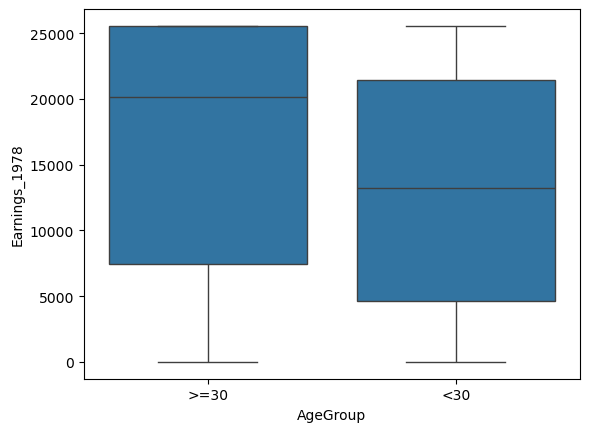

In [29]:
# 1 - Demo of function

def age_splitter (df, col_name, age_threshold):  
    below = df[ df[col_name] < age_threshold ]     
    above_equal = df[ df[col_name] >= age_threshold ]
    return below, above_equal


# 2 Percentage Under 30
below_30, above_equal_30 = age_splitter(df, "Age", 30)
pct_below_30 = (len(below_30) / len(df)) * 100
print("The percentage of people that are < 30 years old: " +str(round(pct_below_30, 2)) + "%")


# 3 - 1978 Earnings Comparison
# ARITHMETIC COMPARISON: we can compare the mean of each group

mean_below30 = below_30["Earnings_1978"].mean()
mean_above30 = above_equal_30["Earnings_1978"].mean()

print("Mean of the 1978 earnings of the group of people < 30 years old: " +str(round(mean_below30, 2)))
print("Mean of the 1978 earnings of the group of people >= 30 years old: " +str(round(mean_above30, 2)))

# VISUAL COMPARISON: 

# We add a column to identify age groups
df["AgeGroup"] = df["Age"].apply(lambda x: "<30" if x < 30 else ">=30")

# we create a boxplot
sns.boxplot(x = "AgeGroup", y = "Earnings_1978", data = df)





### Part 2

<ol>
<li>Create a function in the .py file called cohortCompare that takes two arguments - a dataframe and a list of categorical column names. The function should return a dictonary of the key statistics of each numerical columns and counts for categorical columns.</li>
    <ul>
    <li> Mean, Median, Standard Deviation, Min, Max for numerical columns </li>
    <li> Counts for categorical columns </li>
    <li><b>Note:</b> Please use the CohortMetric object to store and manage the statistics for each cohort.</li>
    </ul>
<li> Does this data, at a high level, appear to be representative of the general population of the US in the late 70s? Does it now? Why or why not? </li>
    <ul>
    <li> This does not need to be a long answer or done in increadable depth. This question will generate some demographic profiles of people in the data - does that appear to be similar to the US population at the time? </li>
    <li> Please state how you assessd this. (There isn't one correct answer, the process is more important than the answer) </li>
    </ul>
<li>Print the dictionary returned in a nice-ish way. (Don't go crazy, basic formatting)</li>
</ol>

In [ ]:


# 1 - Demo of function

class CohortMetric:
    def __init__(self, col_type):
        self.col_type = col_type  # "numeric" or "categorical"
        self.values = {}

    def set_values(self, series, statistics):
        if self.col_type == "numeric":
            stats_map = {
                "mean": series.mean,
                "median": series.median,
                "std": lambda: series.std(ddof=1),
                "min": series.min,
                "max": series.max
            }
            self.values = {stat: float(stats_map[stat]()) for stat in statistics}
        else:
            counts = series.value_counts(dropna=False).to_dict()
            self.values = {("NaN" if (isinstance(k, float) and pd.isna(k)) else str(k)): int(v)
                           for k, v in counts.items()}

    def to_dict(self):
        out = {"type": self.col_type}
        out.update(self.values)
        return out


def cohortCompare(df, cohorts, statistics=['mean', 'median', 'std', 'min', 'max']):
    result = {}

    # Numerical columns 
    numeric_cols = df.select_dtypes(include="number").columns.difference(cohorts)

    # numerical
    for col in numeric_cols:
        metric = CohortMetric("numeric")
        metric.set_values(df[col].dropna(), statistics)
        result[col] = metric.to_dict()

    # categorical
    for col in cohorts:
        metric = CohortMetric("categorical")
        metric.set_values(df[col], statistics)
        result[col] = metric.to_dict()

    return result



# 2 - Comparison
# See the markdown cell below

2. Comparison:
At a high level, this dataset doesn't look fully representative of the U.S. population in the late 1970s, and even less so today. The reason is that the sample comes from a specific program or study group, not a random survey of the whole country. For example, the shares of people by education, marital status, or ethnic group don't match exactly what national statistics from the 1970s would show.
I assessed this by looking at the distributions of demographic variables in the dataset (such as education level, marital status, and ethnicity) and by checking the summary statistics of age and earnings. When I compare these numbers with what is historically known about the U.S. population, there are clear differences, so the dataset can't' be considered nationally representative.

In [31]:

# 3 - A function that prints the dictionary returned by cohortCompare in a readable way
cat_cols = [c for c in ["Sex", "Race", "MaritalStatus", "Hisp", "Nodeg"] if c in df.columns]
num_age_col = "Age" if "Age" in df.columns else None

print("\n=== Share of categories (in %) ===")
for col in cat_cols:
    vc = (df[col].value_counts(dropna=False, normalize=True) * 100).round(2)
    print("\n- {}".format(col))
    for k, v in vc.items():
        label = "NaN" if (isinstance(k, float) and pd.isna(k)) else str(k)
        print("  {:<12} : {}%".format(label, v))

if num_age_col is not None:
    print("\n=== Age stats ===")
    s = df[num_age_col].dropna()
    print("mean   : {:.2f}".format(s.mean()))
    print("median : {:.2f}".format(s.median()))
    print("std    : {:.2f}".format(s.std(ddof=1)))
    print("min    : {:.2f}".format(s.min()))
    print("max    : {:.2f}".format(s.max()))

    # By age group
    bins = [0, 20, 30, 40, 50, 60, 200]
    labels = ["<20", "20–29", "30–39", "40–49", "50–59", "60+"]
    age_band = pd.cut(df[num_age_col], bins=bins, labels=labels, right=False)
    dist = (age_band.value_counts(dropna=False, normalize=True) * 100).round(2)
    print("\nDistribution by age group (%)")
    for k, v in dist.sort_index().items():
        label = "NaN" if pd.isna(k) else str(k)
        print("  {:<6} : {}%".format(label, v))



=== Share of categories (in %) ===

- Race
  NotBlack     : 92.65%
  black        : 7.35%

- MaritalStatus
  Married      : 71.17%
  NotMarried   : 28.83%

- Hisp
  NotHispanic  : 92.8%
  hispanic     : 7.2%

- Nodeg
  0            : 70.42%
  1            : 29.58%

=== Age stats ===
mean   : 33.23
median : 31.00
std    : 11.05
min    : 16.00
max    : 55.00

Distribution by age group (%)
  <20    : 10.47%
  20–29  : 34.25%
  30–39  : 25.19%
  40–49  : 18.88%
  50–59  : 11.2%
  60+    : 0.0%


### Part 3

<ol>
<li> Create a function in the .py file called effectSizer that takes in a dataframe, a numerical column name, a column name of a categorical value that is binary (two values only), and returns a dictionary of the categorical classes and their corresponding effect sizes on the numerical value. </li>
<li> For 1978, which of Race, Hisp, MaritalStatus have the largest effect size. (Use Yes/True/1 for x1)</li>
</ol>

In [32]:
# 1. Demo of function
def effectSizer(df, num_col, cat_col):
    values = df[cat_col].unique()
    group1 = df[df[cat_col] == values[0]][num_col]
    group2 = df[df[cat_col] == values[1]][num_col]

    n1, n2 = len(group1), len(group2)
    m1, m2 = group1.mean(), group2.mean()
    v1, v2 = group1.var(), group2.var()
    diff = m1 - m2
    
    pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d
    


# 2. Effect sizes comparison

race = effectSizer(df, "Earnings_1978", "Race")
print("Race: ", round(race,3))
hisp = effectSizer(df, "Earnings_1978", "Hisp")
print("Hisp: ", round(hisp,3))
status = effectSizer(df, "Earnings_1978", "MaritalStatus")
print("Marital status: ", round(status,3))


Race:  0.319
Hisp:  0.162
Marital status:  0.574
